In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1 Manual Data "X" vs "y"

In [ ]:
data = {
    "X" : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    "y" : [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]
}

df = pd.DataFrame(data)

df.T

,0,1,2,3,4,5,6,7,8,9
X,0,1,2,3,4,5,6,7,8,9
y,1,3,2,5,7,8,8,9,10,12


## a) Print first 5 rows of data

In [15]:
df.head()

,X,y
0,0,1
1,1,3
2,2,2
3,3,5
4,4,7


## b) Display scatter plot of data

<Axes: xlabel='X', ylabel='y'>

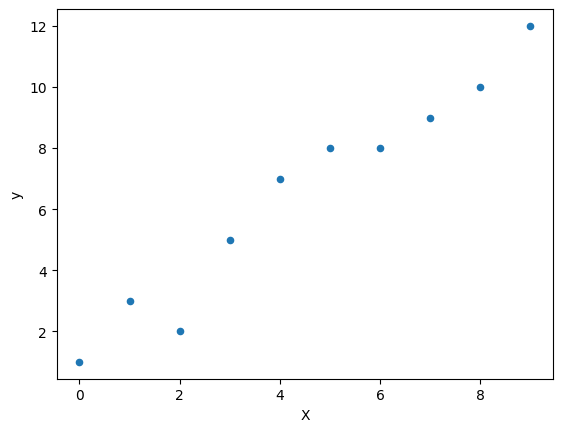

In [16]:
df.plot.scatter('X', 'y')

## c) Calculate (using formula) and print regression coefficients b0 and b1

In [20]:
# y = b0 + b1 * X

mean_X = df['X'].mean()
mean_y = df['y'].mean()

num = sum((df['X'] - mean_X) * (df['y'] - mean_y))
den = sum((df['X'] - mean_X) ** 2)

# slope: b1
b1 = num / den

# intercept: b0
b0 = mean_y - (b1 * mean_X)

print(f"Regression Coefficient b0 (Intercept): {b0:.4f}")
print(f"Regression Coefficient b1 (Slope): {b1:.4f}")

Regression Coefficient b0 (Intercept): 1.2364
Regression Coefficient b1 (Slope): 1.1697


## d) Display regression line equation

In [24]:
print(f"y = {b0:.2f} + {b1:.2f} * X")

y = 1.24 + 1.17 * X


In [25]:
df['y_pred'] = b0 + (b1 * df['X'])

df.T

,0,1,2,3,4,5,6,7,8,9
X,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
y,1.000000,3.000000,2.000000,5.000000,7.000000,8.000000,8.000000,9.000000,10.000000,12.000000
y_pred,1.236364,2.406061,3.575758,4.745455,5.915152,7.084848,8.254545,9.424242,10.593939,11.763636


## e) Calculate and print coefficient of determination (R squared, Residual sum of squares (RSS), and RMSE)

In [27]:
# RSS = sum( ( y(i) - y_pred(i) )^2 )
rss = sum((df['y'] - df['y_pred']) ** 2)

# TSS = sum( ( y(i) - y_mean() )^2 )
tss = sum((df['y'] - mean_y) ** 2)

# R^2 = 1 - (RSS/TSS)
r_squared = 1 - (rss / tss)

n = len(df)

# RMSE = sqrt( RSS / n )
rmse = (rss / n) ** 0.5

print(f"Residual Sum of Squares (RSS): {rss:.4f}")
print(f"Coefficient of Determination (R^2): {r_squared:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Residual Sum of Squares (RSS): 5.6242
Coefficient of Determination (R^2): 0.9525
Root Mean Squared Error (RMSE): 0.7499


## f) Plot regression line

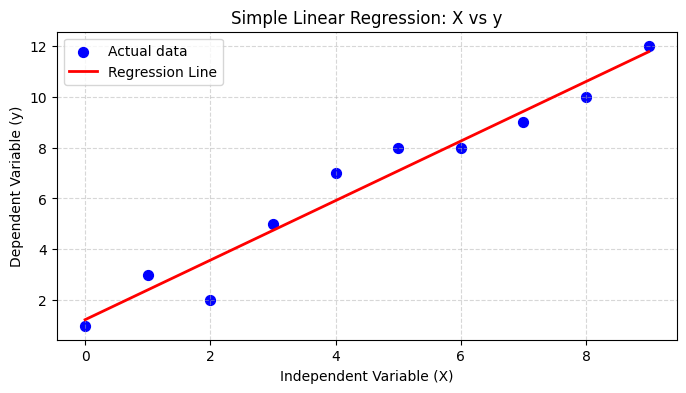

In [46]:
plt.figure(figsize=(8, 4))
plt.scatter(df['X'], df['y'], color='blue', label='Actual data', s=50)
plt.plot(df['X'], df['y_pred'], color='red', linewidth=2,  label='Regression Line')
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.title('Simple Linear Regression: X vs y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## g) Predict the value of y given x=10

In [47]:
x_new = 10

y_pred_new = b0 + (b1 * x_new)

print(f"For X = {x_new}, the predicted value of y is: {y_pred_new:.4f}")

For X = 10, the predicted value of y is: 12.9333


# 2. Inbuilt functions in Python

## a) Import the packages

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## b) Read data set

In [5]:
adv_ds = pd.read_csv('data/Advertising.csv')

adv_ds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## c) 'TV' as independent var & 'sales' as dependent var

In [52]:
X = adv_ds[['TV']]
y = adv_ds['Sales']

## d) Dividing data into training and testing split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## e) instance of LinearRegression class

In [54]:
model = LinearRegression()

## f) Fit the model for training

In [ ]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


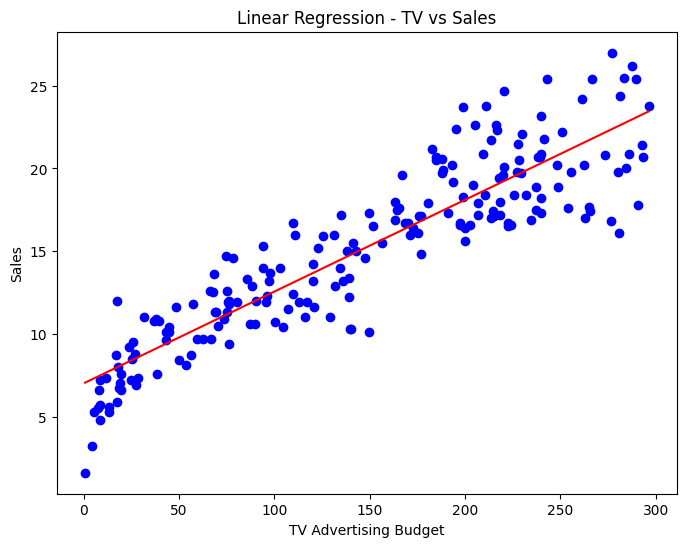

In [72]:
plt.figure(figsize=(8,6))

plt.scatter(X, y, color='blue')
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("Linear Regression - TV vs Sales")

X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(X_line)

plt.plot(X_line, y_line, color='red')

plt.show()

## g) Get coeff of regression and coeff of determination from the model

In [63]:
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")

r2_score = model.score(X_train, y_train)
print(f"R^2 Score (Training Data): {r2_score:.4f}")

Intercept: 7.0071
Coefficient: 0.0555
R^2 Score (Training Data): 0.8135


## h) Apply the model for predictions on testing data

In [68]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_test_pred.shape

(40,)

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


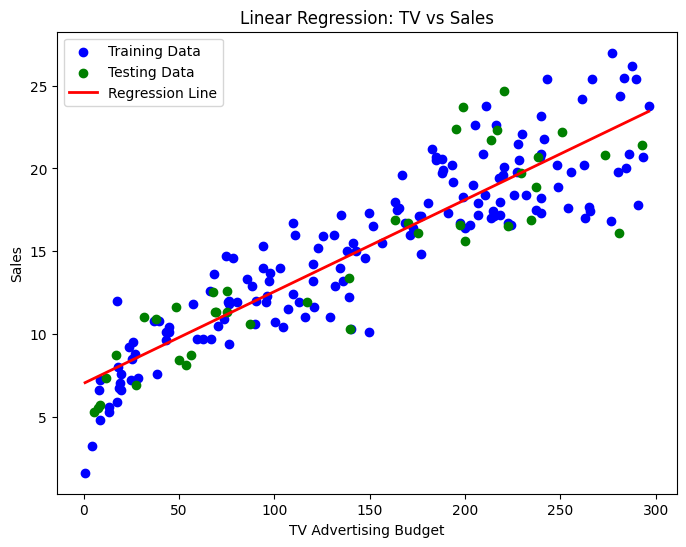

In [73]:
# ---------------------------------------------------
# Plot Regression Line with Train and Test Data
# ---------------------------------------------------

plt.figure(figsize=(8,6))

# Plot training data (blue)
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot testing data (green)
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Create smooth regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(X_line)

# Plot regression line (red)
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("Linear Regression: TV vs Sales")

plt.legend()
plt.show()

## i) residual error plot for training (green dots), testing data (blue dots) and zero residual error line

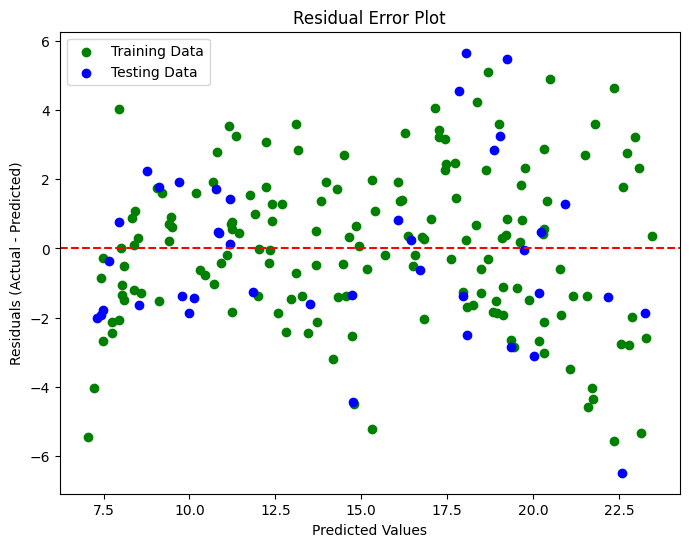

In [69]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure(figsize=(8,6))


plt.scatter(y_train_pred, train_residuals,
            color='green', label='Training Data')


plt.scatter(y_test_pred, test_residuals,
            color='blue', label='Testing Data')


plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Error Plot")
plt.legend()

plt.show()

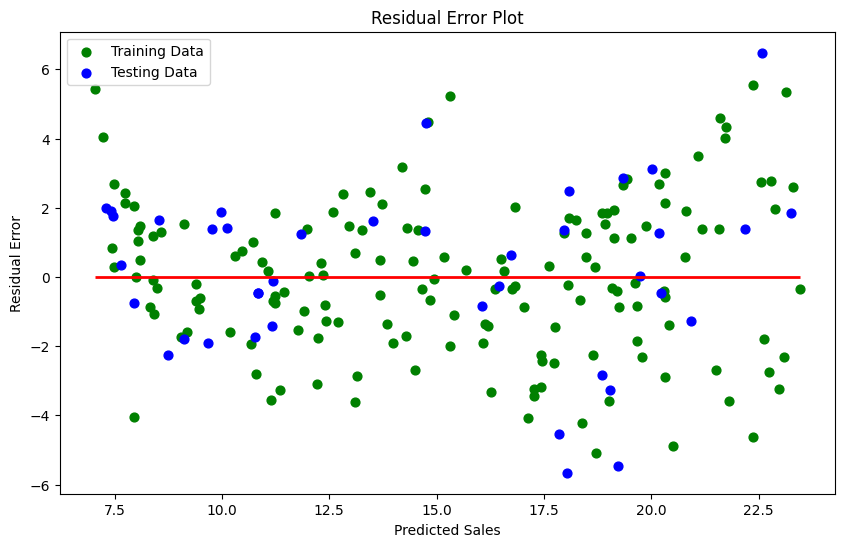

In [70]:
plt.figure(figsize=(10, 6))

# Plotting residuals (Actual value - Predicted value)
plt.scatter(y_train_pred, y_train_pred - y_train, color='green', label='Training Data', s=40)
plt.scatter(y_test_pred, y_test_pred - y_test, color='blue', label='Testing Data', s=40)

# Zero residual error line
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), color='red', linewidth=2)

plt.title('Residual Error Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')
plt.legend()
plt.show()